# Time series task

In the [previous notebook](https://github.com/arctic-source/Data-mining---sustainability/blob/main/question1.ipynb), I answered the following question: **In the present, which countries are the biggest CO2 producers on the planet? And which are the biggest CO2 producers per capita?** While this analysis is a good starting point to explore which countries are the major contributors to the possible climate disaster in the future, the relationship between a country-specific statistics and the CO2 production is not yet properly addressed. To answer this question, time series analysis can be used to tell "how" CO2 emissions change in time for the countries with highest yearly emissions.

---------------
## Research question
**Analyze the time series of yearly CO2 production that is being generated by the 5 biggest producers of CO2 in the world. Specifically, perform the following:**
- **exploratory analysis of the CO2 per capita time series**
- **event analysis**
- **stationarity**
- **autocorrelation analysis**

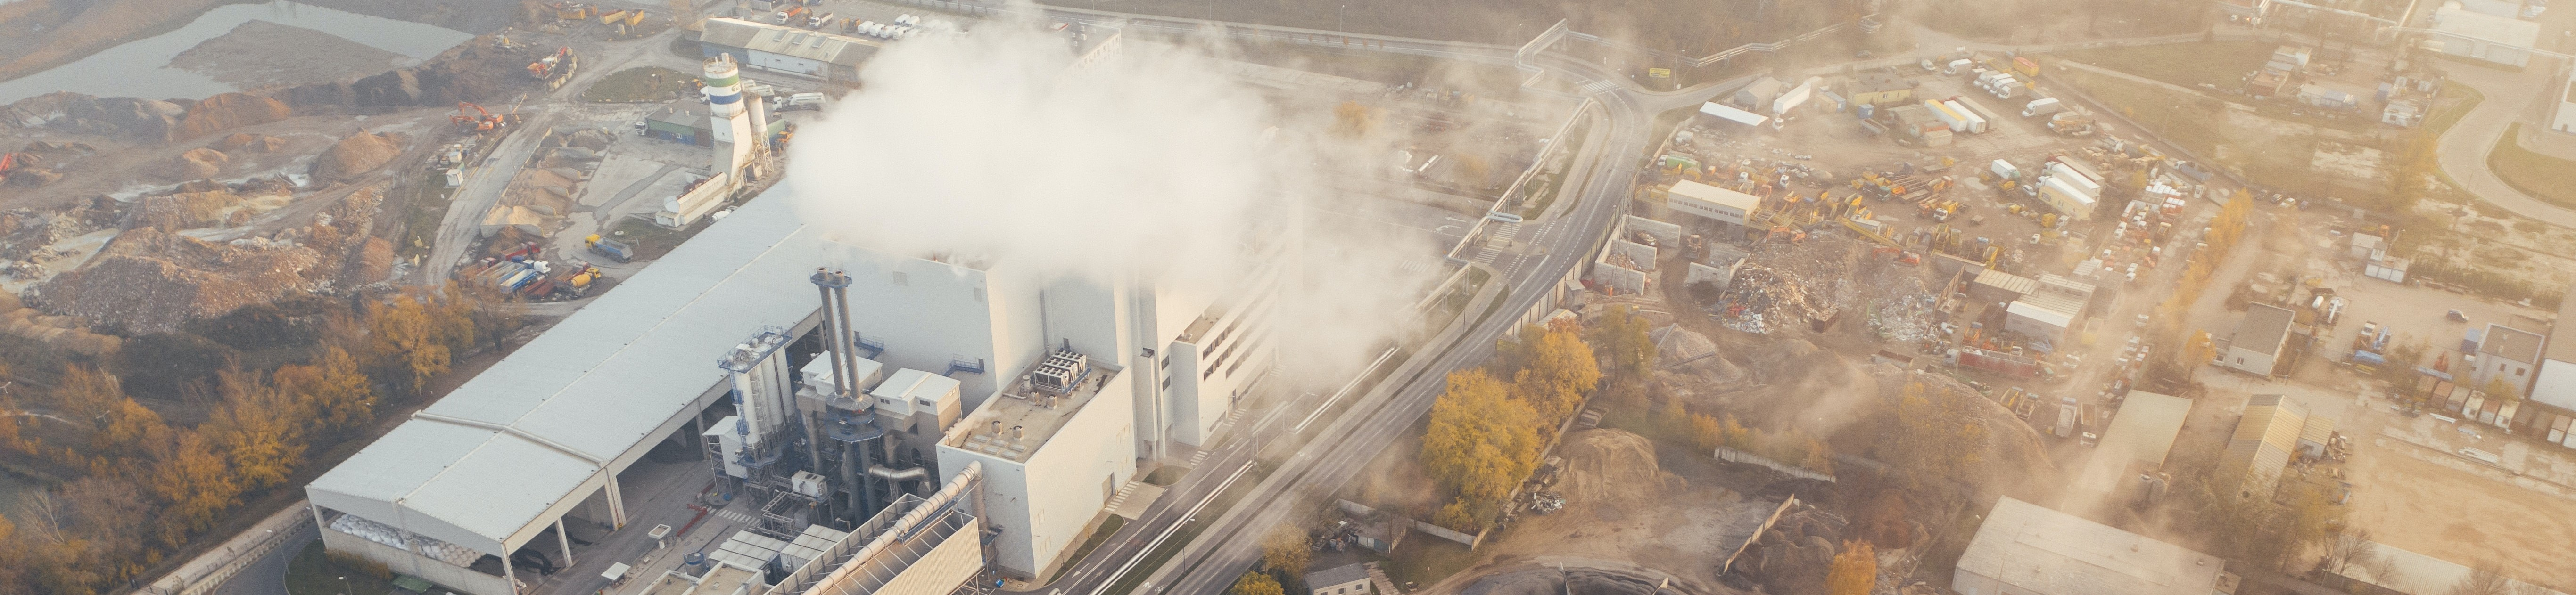

---------------
## Exploratory analysis

In [403]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [404]:
# load SDG dataset to pandas
data_dir = os.path.join('data', 'original raw', 'various years')
sdg_path = os.path.join(data_dir, 'sdg_data.xlsx')

print('Reading SDG dataset ...')
sdg_dataset_raw = pd.read_excel(sdg_path)
print('Done.')

Reading SDG dataset ...
Done.


In [405]:
# explore SDG dataset - beginning
sdg_dataset_raw.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
2  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
3  Access to electricity, urban (% of urban popul...  EG.ELC.ACCS.UR.ZS   
4  Account ownership at a financial institution o...     FX.OWN.TOTL.ZS   

  YR1990 YR1991 YR1992 YR1993 YR1994 YR1995  ...     YR2011     YR2012  \
0     ..     ..     ..     ..     ..     ..  ...       21.8         23   
1     ..     ..     ..     ..     ..     ..  ...  43.222019  69.099998   
2     ..     ..     ..     ..     ..     ..  ...   29.57288  60.849155   
3     ..     ..     ..     ..     ..     ..  ...   86.56778         95   
4     ..     ..     ..     ..     ..     ..  ...       9.01         ..   

      YR2013     YR2014     YR2015     YR2016     YR2017     YR2018  \
0       24.8       26.1       27.4       28.6       29.7       30.9   
1  68.290649       89.5       71.5  97.699997  97.699997  96.616135   
2  60.566135  86.500511  64.573357  97.099358  97.091972  95.586174   
3  92.259048  98.699997       92.5       99.5       99.5  99.626022   
4         ..       9.96         ..         ..      14.89         ..   

      YR2019     YR2020  
0       31.9       33.2  
1  97.699997  97.699997  
2   97.07563  97.066711  
3       99.5       99.5  
4         ..         ..  

[5 rows x 35 columns]

In [406]:
# explore SDG dataset - end
sdg_dataset_raw.tail(8)

Country Name Country Code  \
79863                                           Zimbabwe          ZWE   
79864                                           Zimbabwe          ZWE   
79865                                           Zimbabwe          ZWE   
79866                                                NaN          NaN   
79867                                                NaN          NaN   
79868                                                NaN          NaN   
79869  Data from database: Sustainable Development Go...          NaN   
79870                           Last Updated: 07/22/2022          NaN   

                                             Series Name  \
79863  Women who were first married by age 18 (% of w...   
79864  Coverage of social insurance programs (% of po...   
79865  Educational attainment, at least completed sho...   
79866                                                NaN   
79867                                                NaN   
79868                                                NaN   
79869                                                NaN   
79870                                                NaN   

                    Series Code YR1990 YR1991 YR1992 YR1993 YR1994 YR1995  \
79863         SP.M18.2024.FE.ZS     ..     ..     ..     ..     31     ..   
79864  per_si_allsi.cov_pop_tot     ..     ..     ..     ..     ..     ..   
79865         SE.TER.CUAT.ST.ZS     ..     ..     ..     ..     ..     ..   
79866                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
79867                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
79868                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
79869                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
79870                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...   YR2011   YR2012 YR2013    YR2014 YR2015 YR2016    YR2017 YR2018  \
79863  ...     30.5       ..     ..      33.5   32.4     ..        ..     ..   
79864  ...  2.65504       ..     ..        ..     ..     ..  3.407481     ..   
79865  ...       ..  3.39972     ..  13.05274     ..     ..   9.41853     ..   
79866  ...      NaN      NaN    NaN       NaN    NaN    NaN       NaN    NaN   
79867  ...      NaN      NaN    NaN       NaN    NaN    NaN       NaN    NaN   
79868  ...      NaN      NaN    NaN       NaN    NaN    NaN       NaN    NaN   
79869  ...      NaN      NaN    NaN       NaN    NaN    NaN       NaN    NaN   
79870  ...      NaN      NaN    NaN       NaN    NaN    NaN       NaN    NaN   

          YR2019 YR2020  
79863  33.658057     ..  
79864   4.807448     ..  
79865         ..     ..  
79866        NaN    NaN  
79867        NaN    NaN  
79868        NaN    NaN  
79869        NaN    NaN  
79870        NaN    NaN  

[8 rows x 35 columns]

In [407]:
# last couple rows do not hold useful data - drop them
nrows = sdg_dataset_raw.shape[0]
rows_to_drop = 6
sdg_dataset = sdg_dataset_raw.loc[:nrows-rows_to_drop]

# also drop 'Country Code' and 'Series Code' because I will approach the dataset using the 'Country Name' and 'Series Name' columns as they are more descriptive for this analysis
sdg_dataset = sdg_dataset.drop(columns=['Country Code', 'Series Code'], axis=0)

# change column name format from 'YR1990' to '1990'
col_rename = {col: col.replace("YR", "") for col in sdg_dataset.columns if 'YR' in col}
sdg_dataset.rename(mapper=col_rename, inplace=True, axis=1)
sdg_dataset.columns

Index(['Country Name', 'Series Name', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [408]:
# filter CO2 emissions for biggest CO2 producers
country_data = sdg_dataset[(sdg_dataset['Country Name'].isin(['China', 'United States', 'India', 'Russian Federation', 'Japan']))]
emission_data = country_data[country_data['Series Name'] == 'CO2 emissions (metric tons per capita)']
emission_data = emission_data.transpose()
emission_data

13512  \
Country Name                                   China   
Series Name   CO2 emissions (metric tons per capita)   
1990                                        1.914543   
1991                                        2.000539   
1992                                        2.075744   
1993                                        2.244841   
1994                                        2.322192   
1995                                        2.563479   
1996                                        2.521876   
1997                                        2.547902   
1998                                        2.605837   
1999                                         2.51742   
2000                                        2.650412   
2001                                        2.774761   
2002                                         2.97568   
2003                                        3.427437   
2004                                        3.954107   
2005                                          4.4677   
2006                                        4.910276   
2007                                        5.306366   
2008                                        5.435076   
2009                                        5.798319   
2010                                        6.335418   
2011                                        6.901344   
2012                                        7.046183   
2013                                        7.324147   
2014                                        7.294236   
2015                                        7.146449   
2016                                        7.115385   
2017                                        7.230985   
2018                                        7.487332   
2019                                        7.605937   
2020                                              ..   

                                               33096  \
Country Name                                   India   
Series Name   CO2 emissions (metric tons per capita)   
1990                                        0.645362   
1991                                        0.681306   
1992                                        0.688755   
1993                                        0.702337   
1994                                        0.725358   
1995                                        0.765476   
1996                                        0.787966   
1997                                        0.818533   
1998                                        0.820288   
1999                                        0.868285   
2000                                        0.887641   
2001                                        0.887014   
2002                                         0.90134   
2003                                        0.910255   
2004                                         0.96109   
2005                                        0.990293   
2006                                        1.042663   
2007                                        1.129758   
2008                                        1.186321   
2009                                        1.285084   
2010                                        1.344896   
2011                                        1.405068   
2012                                        1.508508   
2013                                        1.539948   
2014                                        1.657231   
2015                                        1.647152   
2016                                        1.657396   
2017                                        1.733361   
2018                                        1.812696   
2019                                         1.79762   
2020                                              ..   

                                               35850  \
Country Name                                   Japan   
Series Name   CO2 emissions (metric tons per capita)   
1990                                        8.831776   
1991         

In [409]:
# final touches to data

# make years the indices of the dataframe
emission_data = emission_data.rename(columns=emission_data.iloc[0])
# drop leftover rows that do not hold valuable information
emission_data.drop(axis='index', labels=['Country Name', 'Series Name'], inplace=True)
# replace the useless column names with the country names
emission_data.drop(emission_data.index[-1], inplace=True)
# change the data type of the index to int
emission_data.index = emission_data.index.astype(int)
emission_data

China     India     Japan Russian Federation United States
1990  1.914543  0.645362  8.831776          14.621468     19.407346
1991  2.000539  0.681306   8.90565          14.397057     19.003403
1992  2.075744  0.688755  8.961704          13.671972      19.02286
1993  2.244841  0.702337  8.873018          12.665132     19.218333
1994  2.322192  0.725358  9.273035          11.354179     19.256212
1995  2.563479  0.765476  9.332839          11.022621     19.216909
1996  2.521876  0.787966  9.420311          10.807091      19.57538
1997  2.547902  0.818533  9.302379          10.070016     20.330855
1998  2.605837  0.820288  8.942326          10.076265       20.2663
1999   2.51742  0.868285  9.202486           10.35032     20.101132
2000  2.650412  0.887641  9.323416           10.66769     20.469807
2001  2.774761  0.887014  9.204791           10.73577     20.171531
2002   2.97568   0.90134  9.467613          10.772677     19.445549
2003  3.427437  0.910255  9.512754          11.130421     19.506499
2004  3.954107   0.96109  9.469635          11.112722     19.597631
2005    4.4677  0.990293  9.491989          11.231837     19.469262
2006  4.910276  1.042663  9.303737          11.568362     18.945914
2007  5.306366  1.129758  9.570784          11.611279     19.042914
2008  5.435076  1.186321  9.044142          11.595646     18.278494
2009  5.798319  1.285084  8.598249          10.832134     16.808699
2010  6.335418  1.344896  9.030062          11.325418     17.431738
2011  6.901344  1.405068  9.493011          11.884997     16.604218
2012  7.046183  1.508508  9.822297          11.702094     15.789783
2013  7.324147  1.539948  9.908431          11.377007     16.111184
2014  7.294236  1.657231   9.56284          11.208203     16.040921
2015  7.146449  1.647152  9.276629           11.05201     15.560035
2016  7.115385  1.657396  9.189698          10.887446     15.149885
2017  7.230985  1.733361  9.098305          11.035197     14.823261
2018  7.487332  1.812696  8.801681          11.496571     15.222548
2019  7.605937   1.79762   8.54098          11.797203     14.673411

-------------
## Event analysis

The figure below shows the trends in CO2 production per capita in metric tons, in the time range of 1990-2019. The countries shown in the analysis are picked because these are the 5 largest producers of CO2 in terms of metric tons produced in 2019 [source: [my data analysis with the highest CO2 producers](http://localhost:8888/lab/tree/question1.ipynb)]. Apart from generating this plot, I will mention the visual trends and try to pinpoint any interesting points in the numbers to events.  

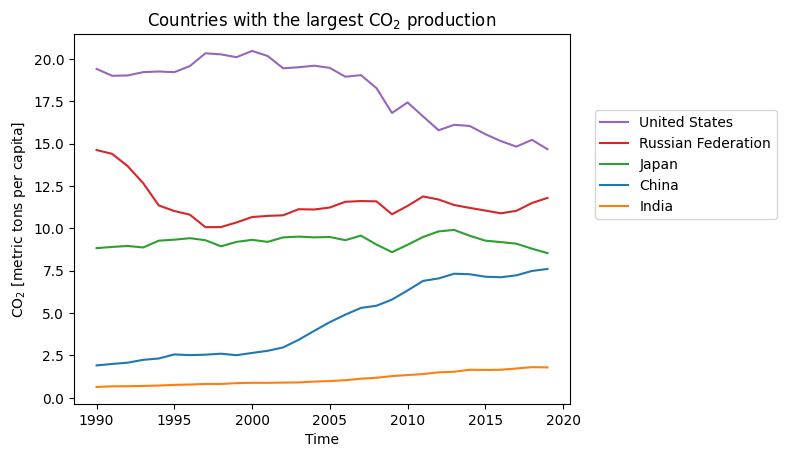

In [410]:
# Plot - Countries with the largest CO2 per capita production
emission_data.plot()
plt.title('Countries with the largest CO$_2$ production')
plt.xlabel('Time')
plt.ylabel('CO$_2$ [metric tons per capita]')
# rearrange the order of countries on the legend to correspond with the plot
handles, labels = plt.gca().get_legend_handles_labels()
legend_order = [4, 3, 2, 0, 1]
plt.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], loc=(1.05, 0.5))
plt.show()

**USA**  
The highest emissions per capita belong to the USA, which reached its peak emission production around the year 2000, with emissions as high as 20 metric tons of CO2 per capita. Since then, a light downward trend can be observed. Some have argued that this decline cannot be attributed to a single factor, but can be explained by a mix of several factors: large-scale transition from coal to gas, a large increase in wind power, a reduction in industrial energy use and changes in transport patterns [source: [carbonbrief.org analysis](https://www.carbonbrief.org/analysis-why-us-carbon-emissions-have-fallen-14-since-2005/)]. Moreover, another drop is visible in the data around the year of 2009, which could potentially be attributed to the [2007-2008 global financial crisis](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis) with the burst of the US housing bubble, slowing down the economics and hence, lowering the CO2 production.  
**Russian Federation**  
While Russia's CO2 emissions are relatively stable after the year 2000, they are stable at very high values. A [commentary in the Center for Strategic and International Studies](https://www.carbonbrief.org/analysis-why-us-carbon-emissions-have-fallen-14-since-2005/) claims that it is critical to keep regions of Russia at stable temperatures, else we risk a leak of greenhouse gases trapped under Russian permafrost regions. This would be the equivalent of 0.2 - 6.6 fold of the yearly global CO2 production and it would therefore become a problem of global scale. The dip in CO2 emissions in 1990-1995 could potentially be explained by the collapse of the Soviet Union, slowing down the economics.   
**Japan**  
As can be seen in the plot, Japan's emissions per capita are relatively stable along the whole time period except for the drop and a raise after the 2007-2008 global financial crisis.  
**China**  
The emissions of China underwent a relatively sharp rise since 2000 and increased by as much as 300%. Together with a very large population, this is bad news for the global carbon footprint. The sharp increase of the emissions could correspond to an increase in GDP and better living standards of many people. Interestingly, the 2007-2008 global financial crisis is not visibly reflected in Chinese yearly emissions on this plot.  
**India**  
Despite the massive population numbers similar to China, India's CO2 per capita production stays at relatively low values at 1.8 metric ton per capita, although a low and steady growth can be observed in the whole time range of the analysis.

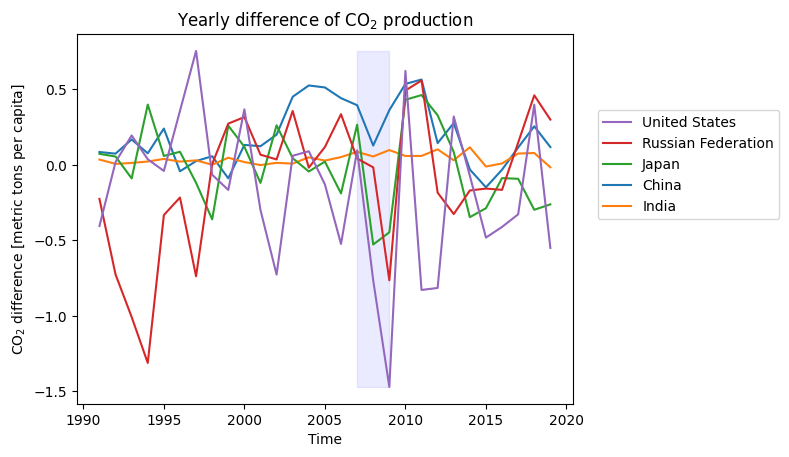

In [411]:
# Plot - first difference of time series
emission_difference = emission_data.diff(periods=1)
emission_difference.plot()
plt.fill_between(x=[2007, 2009], y1=emission_difference.min().min(), y2=emission_difference.max().max(), color='blue', alpha=0.08)
plt.title('Yearly difference of CO$_2$ production')
plt.xlabel('Time')
plt.ylabel('CO$_2$ difference [metric tons per capita]')
handles, labels = plt.gca().get_legend_handles_labels()
legend_order = [4, 3, 2, 0, 1]
plt.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], loc=(1.05, 0.5))
plt.show()

The difference plot above was produced by taking the time series values at a given time and subtracting the previous value from it. This is particularly useful to see the drastic changes in CO2 production. In the blue rectangle, the time window of the 2007-2009 financial crisis is highlighted, clearly showing the impact of the crisis on the economics and on the CO2 production.

-------------
## Stationarity analysis
Stationarity is an important property of a time series that serves as a basic starting point for further analysis and forecasting future values. A time series can be considered stationary under the following conditions:
1. constant mean
2. constant variance
3. constant autocorrelation

A common way to test for stationarity is the augmented Dickey-Fuller test. To perform the test, we will have to define our autoregressive function and our hypotheses.

Let $C_t$ be the carbon dioxide emissions per capita of interest in time $t$. An order 1 time series model would then be:  $C_t$ = $C_0$ + $\sum_i^p \phi_i$ $C_{t-i}$ + $\varepsilon_t$, where $C_0$ is a constant parameter of the time series, $\phi_i$ are coefficients, $C_{t-i}$ are the time series values at lag $t-i$ and $\varepsilon_t$ is an error term. Then, our hypotheses are:

H$_0$ (null hypothesis): "A unit root is present in the AR (autoregressive) model of the time series." In this case, $\phi_i = 1$ and a unit root is present, therefore statistical inference based on this data may be problematic.  
H$_A$ (alternative hypothesis): "The time series is stationary." In this case, $\phi_i < 1$ and a unit root is not present.

In [412]:
print('Analyze stationarity for the original time series using the Augmented Dickey-Fuller test:\n')

def analyze_stationarity(df: pd.DataFrame):
    for country in list(df.columns):
        print(country)
        p_value = adfuller(df[country])[1]
        print(f'p-value: {p_value:.3f}')
        significance_level = 0.05 # common significance level
        if p_value < significance_level:
            stationarity = True
        else:
            stationarity = False
        print(f'Stationarity: {stationarity}\n')

analyze_stationarity(emission_data)

Analyze stationarity for the original time series using the Augmented Dickey-Fuller test:

China
p-value: 0.884
Stationarity: False

India
p-value: 0.997
Stationarity: False

Japan
p-value: 0.022
Stationarity: True

Russian Federation
p-value: 0.003
Stationarity: True

United States
p-value: 0.081
Stationarity: False



As we can see, time series with emissions of Japan and Russia are stationary, however, data of China and India are clearly not stationary and the US data is also not stationary as it has a slightly higher p-value.

To build stationary datasets out of non-stationary datasets, a common approach is to make a difference of the dataset and see if that is stationary.

In [413]:
# stationarity of order 1 difference
print('Analyze stationarity of differentiatiated dataframe (order 1):\n')
emission_data_diff = emission_data.diff(periods=1)
emission_data_diff.dropna(inplace=True)
analyze_stationarity(emission_data_diff)

Analyze stationarity of differentiatiated dataframe (order 1):

China
p-value: 0.140
Stationarity: False

India
p-value: 0.000
Stationarity: True

Japan
p-value: 0.022
Stationarity: True

Russian Federation
p-value: 0.073
Stationarity: False

United States
p-value: 0.001
Stationarity: True



We can see that the **Chinese** and **Russian** time series data still yields **no stationarity**. To attain it, we can perform another difference.

In [414]:
# stationarity of order 2 difference
print('Analyze stationarity of differentiatiated dataframe (order 2):\n')
emission_data_diff2 = emission_data_diff.diff(periods=1)
emission_data_diff2.dropna(inplace=True)
analyze_stationarity(emission_data_diff2)

Analyze stationarity of differentiatiated dataframe (order 2):

China
p-value: 0.000
Stationarity: True

India
p-value: 0.000
Stationarity: True

Japan
p-value: 0.011
Stationarity: True

Russian Federation
p-value: 0.000
Stationarity: True

United States
p-value: 0.000
Stationarity: True



Finally, all time series **can now be considered stationary**. To provide a visual overview, here is a plot of the original, first difference and second difference data:

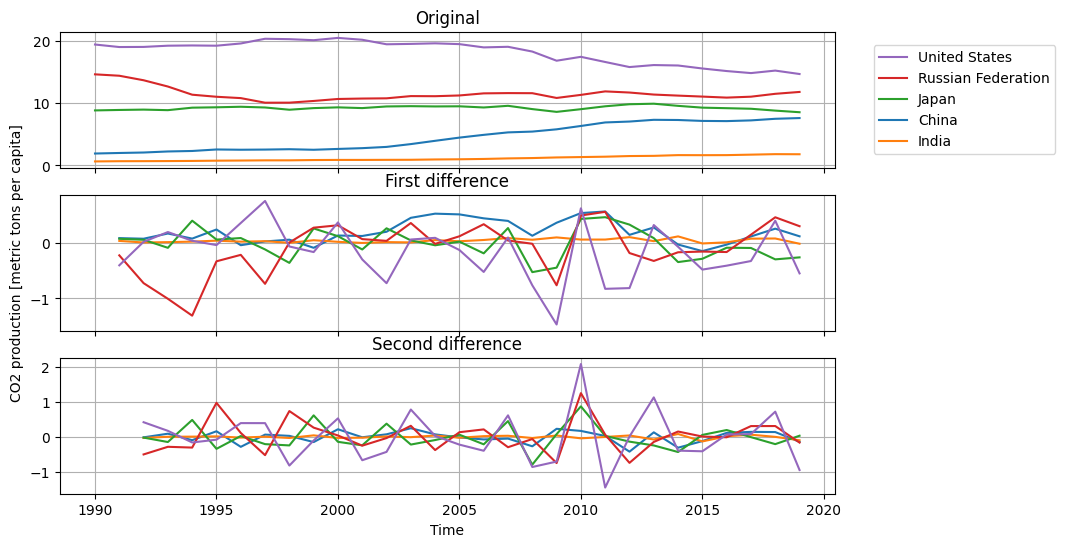

In [415]:
# Plot - comparison of differentiated data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 6))

# top plot
ax1.plot(emission_data)
ax1.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], loc=(1.05, 0.1))
ax1.set_title('Original')
ax1.grid()

# middle plot
ax2.plot(emission_data_diff)
ax2.set_title('First difference')
ax2.set_ylabel('CO2 production [metric tons per capita]')
ax2.grid()

# bottom plot
ax3.plot(emission_data_diff2)
ax3.set_title('Second difference')
ax3.set_xlabel("Time")
ax3.grid()

# adjust space between plots
plt.subplots_adjust(hspace=0.2)
plt.show()

**Stationarity analysis - conclusion**  

After performing the augmented Dickey-Fuller test, I found out that time series of Japan and Russia are stationary without differencing. This suggest a constant mean a variance over time in their emissions and hence, the patterns observed in the series are likely to be repeated in the future given that they are not impacted by a new, outer influence.  

For China, India and the US, stationarity was not discovered before differencing transformations. This implies that these time series include a trend or seasonality. After two differencing transformations, these were removed. This could suggest that the CO2 emissions of these countries could be influenced by factors that change over time. This is consistent with the results of the event analysis above this section - factors such as rapid industrialization and GDP growth (China/India) and lowering carbon footprint in the energy and industry sectors (USA) could play a big role in generating the CO2 emissions.

------------------
## Autocorrelation analysis
### Autocorrelation function (ACF)

The ACF is a powerful statistical tool which is commonly used to tell how strongly is a random process correlated with a time-lagged version of itself. In some cases when high ACF is discovered, this can be an indicator that the time series values can be simply predicted by previous time series values and the prediction based on other factors is actually not needed. In other times, when ACF is low, this could mean that the time series tends to not repeat patterns. The ACF also includes both direct and indirect effects of previous time periods. In our case, this indirect effect means that if significant correlation is discovered in three consequential years, then for example the CO2 production in 2019 could be affected by the same value in 2018, this would be affected by the same value in 2017 etc. Conversely, a direct effect means that the year 2017 would directly affect the year 2019 (with no influences of 2019 by 2018 which would be influenced by 2017).  

Next, I will show an example of the ACF for a randomly picked country out of the five biggest global polluters in the world - I won't be plotting the ACF for each of them as the analysis could lose transparency due to a large number of plots.

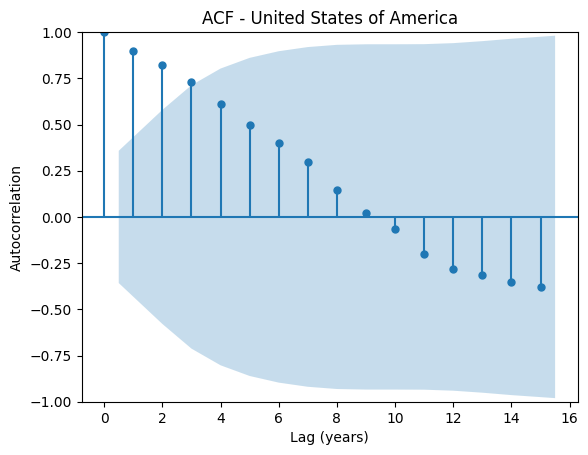

In [416]:
plot_acf(emission_data['United States'], title='ACF - United States of America');
plt.xlabel('Lag (years)')
plt.ylabel('Autocorrelation')
plt.show()

In the plot above, the blue points show the correlation with the past values of the same time series, while the blue-colored area shows the 95% confidence interval. In this case, the point at zero lag has the correlation of 1, since a time series with the same time series will always have a correlation of 1. Next, three other values are above the 95% significance area, and hence we can claim that these values are significant, while the others, situated in the blue area, are not significant.


### Partial autocorrelation function (PACF)

The PACF is another function which aims to describe the correlation between the time series and its lagged version of itself. The main difference between ACF and PACF is that the PACF only captures the direct influences of previous time periods on future data. This means that for example, a value of CO2 production in 2008 may directly influence the CO2 production in 2010.  

I am providing an example of PACF for the same country (USA) as with ACF.

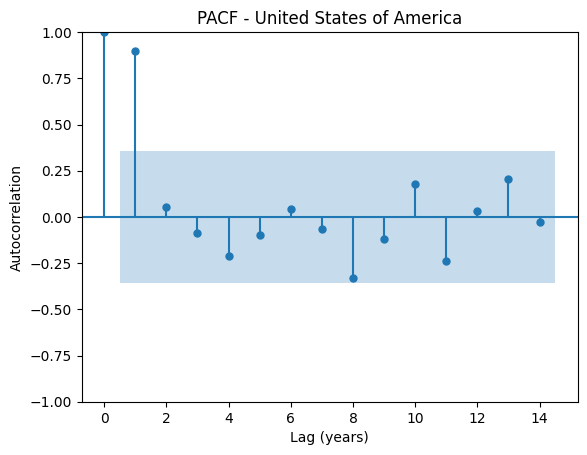

In [417]:
plot_pacf(emission_data['United States'], lags=14, title='PACF - United States of America');
plt.xlabel('Lag (years)')
plt.ylabel('Autocorrelation')
plt.show()

In the plot above, it can be seen that the only significant correlation (other than at lag 0) is at lag 1 year. As we saw in the previous section, the CO2 production of the USA is not stationary by itself, but differentiation transformation needs to take place. Let's then have a look at the ACF and PACF of a double differentiation of the time series which was determined to be stationary in the previous section.

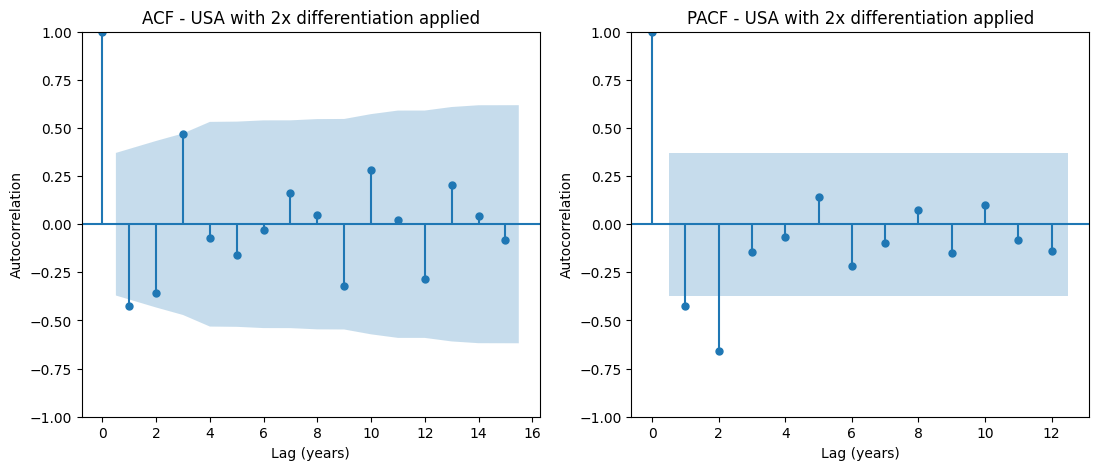

In [418]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (13, 5))

plot_acf(emission_data_diff2['United States'], title='ACF - USA with 2x differentiation applied', ax=ax1);
ax1.set_xlabel('Lag (years)')
ax1.set_ylabel('Autocorrelation')

plot_pacf(emission_data_diff2['United States'], lags=12, title='PACF - USA with 2x differentiation applied', ax=ax2);
ax2.set_xlabel('Lag (years)')
ax2.set_ylabel('Autocorrelation')
plt.show()

The time series used to calculate the above figures is guaranteed to be stationary (differentiation of order 2 applied). Furthermore, the ACF has a last significant point at the lag of 2 years and the PACF has a last significant point at the lag of 2 years too, this could potentially suggest that an autoregressive (AR) model of order 2 or a moving average (MA) model of order 2 could be used, or a mixed model like ARMA could be used since the last significant lag values are the same.  

Below, the results of the same steps of the ACF and PACF analysis is shown for time series regarding other countries.

In [419]:
# Many plots of ACF, PACF
# countries = emission_data.columns
# for country in countries:
#     plot_acf(emission_data[country], title=f'ACF - {country}');
#     plot_pacf(emission_data[country], lags=14, title=f'PACF - {country}');
#     plot_acf(emission_data_diff2[country], title=f'ACF - {country}, DIFFx2');
#     plot_pacf(emission_data_diff2[country], lags=12, title=f'PACF - {country}, DIFFx2');

# manually input the number of significant point at lags other than zero to the following table
autoregression_analysis_results = pd.DataFrame({
    'China':{
        'ACF':3,
        'PACF':1,
        'ACF diffx2':0,
        'PACF diffx2':0
    },
    'India':{
        'ACF':3,
        'PACF':1,
        'ACF diffx2':1,
        'PACF diffx2':1
    },
    'Japan':{
        'ACF':1,
        'PACF':1,
        'ACF diffx2':0,
        'PACF diffx2':2
    },
    'Russian Federation':{
        'ACF':1,
        'PACF':1,
        'ACF diffx2':0,
        'PACF diffx2':1
    },
    'United States':{
        'ACF':3,
        'PACF':1,
        'ACF diffx2':1,
        'PACF diffx2':2
    }
})
print(autoregression_analysis_results)

             China  India  Japan  Russian Federation  United States
ACF              3      3      1                   1              3
PACF             1      1      1                   1              1
ACF diffx2       0      1      0                   0              1
PACF diffx2      0      1      2                   1              2


------------------
## Discussion

I think that the biggest weak point of my analysis, if it would be used for further decision making, would be data quality. While The World Data Bank tries to achieve the best data quality, countries with a large number of people with authoritarian regimes (China, Russian Federation) or poor regions (India) could provide some wrong data points, intentionally or not. I think that there must also be many regions where the CO2 production must be estimated since no official numbers exist and hence, the real numbers can differ a lot.

The second limitation is that while the selected countries in the analysis are the top 5 world's biggest polluters, a large part of the world may have completely different CO2 trends and thus, the analysis may not be completely representative of more countries even if they have similar properties.

Next, it is important to acknowledge that in my previous analysis, I found that the top 5 global CO2 polluters are China, USA, India, Japan and Russian Federation. However, in this analysis, I did not work with the yearly CO2 production but with the yearly CO2 production per capita that will allow to highlight the steps the country is taking towards a carbon-less future. However, general country trends such as population growth and its impact on the CO2 production are therefore neglected in the analysis.

For the future, one could take it a step further and start forecasting using the AR, MA and ARMA models and report the results that can be obtained using these models.

-----------------
## Conclusion
In this notebook, I carried out a time series analysis. I explored the yearly CO2 emissions for the top 5 polluters in the world. I discovered that while the US shows a trend of lowering the CO2 emissions per capita since 2005, other countries such as Japan or Russian Federation keep a relatively steady values in the recent years. Highly populated countries with a fast rate of industrialization such as China show a sharp increase in the CO2 pollution in recent time, while India is keeping a relatively steady rate of emission growth, although at relatively low CO2 emissions per capita.

The stationarity analysis revealed that China, India and the USA possess a time series trend which makes the time series unstationary, with Japan and Russia possessing a stationary trend in emissions, suggesting the patterns could be repeated in the future. Stationarity of China, India and USA was discovered after a differentiation each time series twice.

An autocorrelation analysis was carried out for the time series of all 5 countries' emissions. The autocorrelation typically shows a low order of significant lags (0-3). By differentiation twice, some patterns such as trend and seasonality of the time series were taken out along with some of the autocorrelation in the series.

Time series which underwent this analysis could potentially be used further for forecasting by building an autoregressive model, moving average model, or their mix (ARMA).

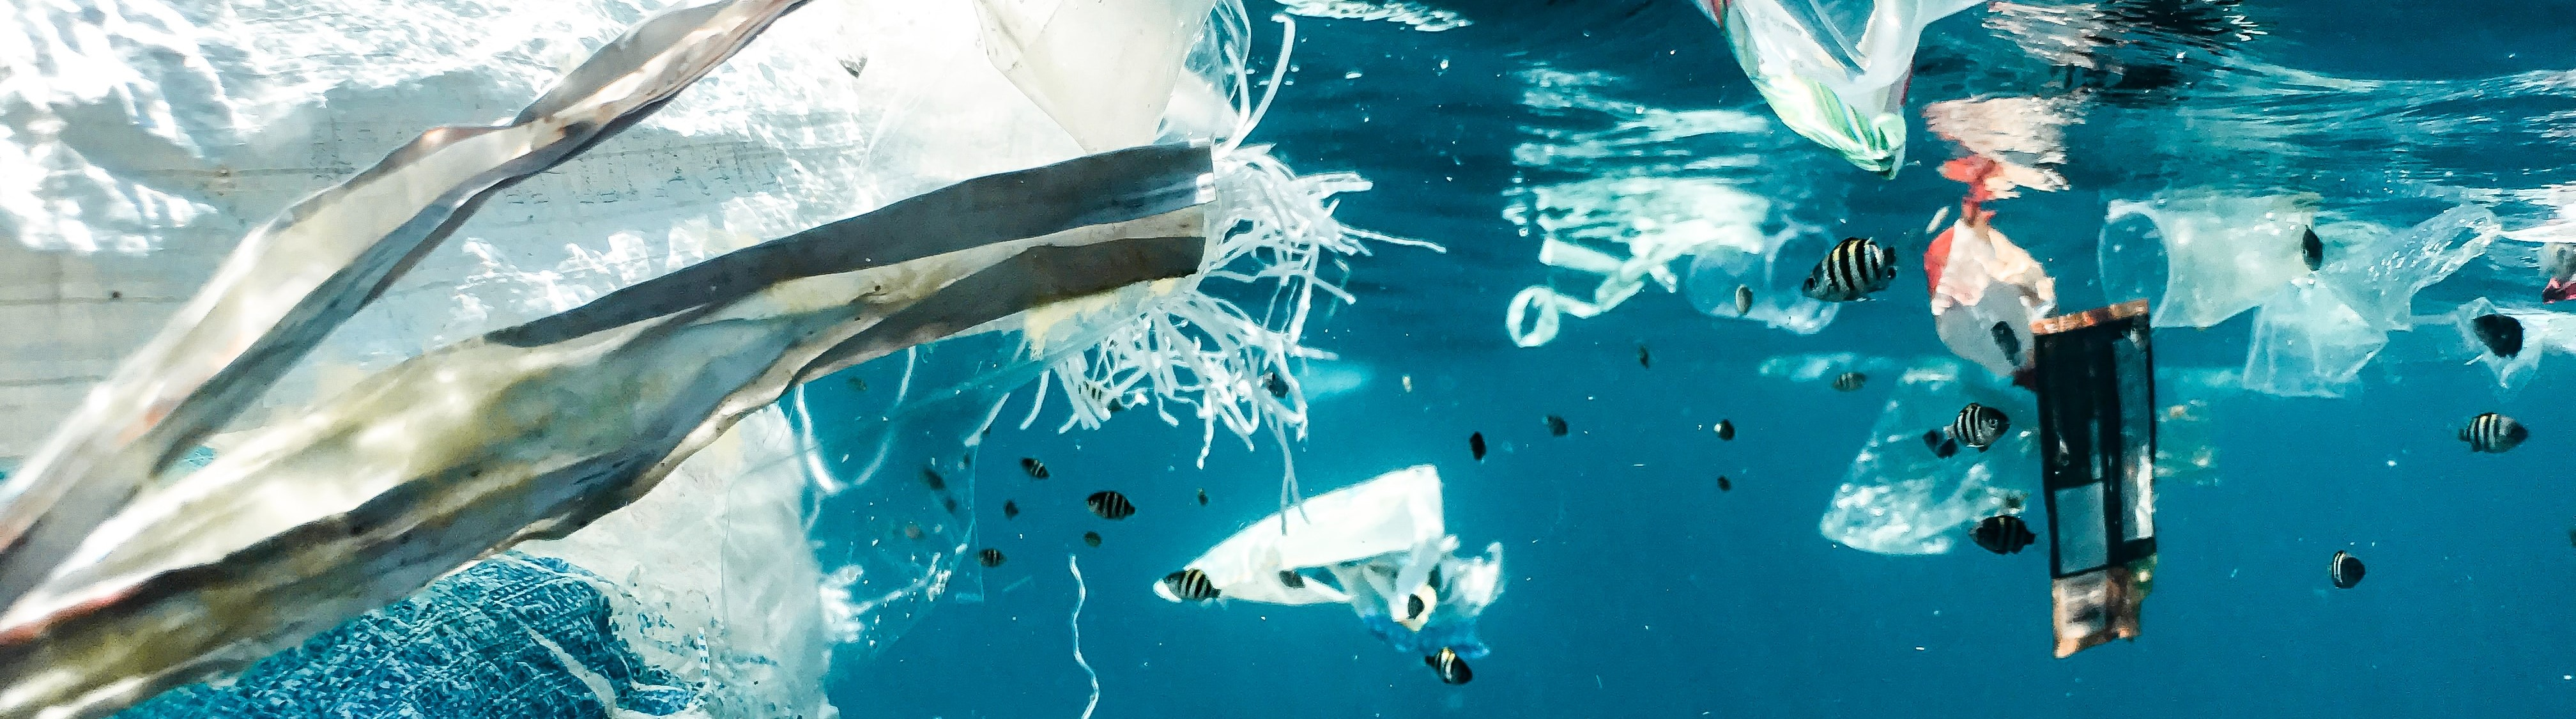